# Quick start on how to access different datasets

This notebook demonstrates how to use the `src.data` module to quickly and easily load different datasets on ligands, kinases, profiling, distances and target datasets.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

from IPython.display import display, HTML
from opencadd.databases import klifs

from src.paths import PATH_DATA, PATH_RESULTS
from src.data import ligands, kinases, profiling, distances, targets

In [3]:
HERE = Path(_dh[-1])  # noqa: F821
DATA = PATH_DATA
RESULTS = PATH_RESULTS / "all"

## Ligand datasets

Get kinase-binding ligand details.

### PKIDB

Number of ligands: 260


,BrandName,Applicants,CHEMBL_ID,Canonical_Smiles,Chirality,First_Approval,Phase,SC_Patent,Synonyms,Withdrawn,...,NRB,TPSA,LogP,RoF,Melting point,Targets,Kinase families,FDA_approved,ID,ROMol
0,-,Incyte Corporation,CHEMBL2216863,Cc1csc2n1c(=O)c(c(n2)[C@H](C)Nc3c4c([nH]cn4)nc...,Single Stereoisomer,nan,0.0,None,"[DEZAPELISIB, INCB040093]",,...,4.0,100.9,3.7,0.0,,[nan],,,Dezapelisib,
1,-,Pfizer,CHEMBL13608,Cc1c([nH]c(c1C(=O)NCCN2CCCC2)C)/C=C\3/c4cc(ccc...,Achiral Molecule,nan,0.0,None,"[PHA-291639, TOCERANIB]",,...,5.0,77.2,3.1,0.0,,[KIT],KIT,,Toceranib,
2,-,Pfizer,CHEMBL2103874,CNS(=O)(=O)C[C@H]1CC[C@@H](CC1)N(c2ncnc3c2cc[n...,Single Stereoisomer,nan,0.0,None,"[JAKI, OCLACITINIB, PF-03394197]",,...,5.0,91.0,1.5,0.0,,"[JAK1, JAK2, JAK3]",Tyr,,Oclacitinib,
3,-,Nanjing Yoko Biomedical,CHEMBL2180602,CCN(CC)CCNC(=O)c1c([nH]c\2c1CCC/C2=C/3\c4cc(cc...,Achiral Molecule,nan,1.0,None,"[SIM 010603, SIM-010603, TAFETINIB]",,...,6.0,77.2,3.7,0.0,,"[KDR, FLT4, FLT1]",Tyr,,Tafetinib,
4,-,TP Therapeutics,CHEMBL4298138,CC1CNC(=O)C2=C3N=C(C=CN3N=C2)NC(C4=C(O1)C=CC(=...,Single Stereoisomer,nan,1.0,None,"[REPOTRECTINIB, TPX-0005, TRX-0005]",,...,0.0,80.6,2.6,0.0,,[nan],,,Repotrectinib,

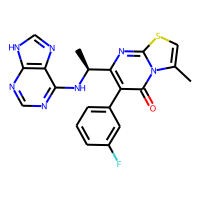
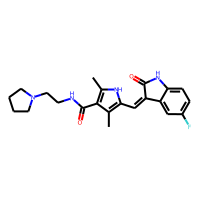
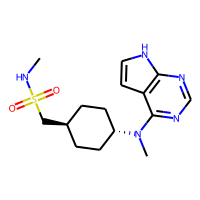
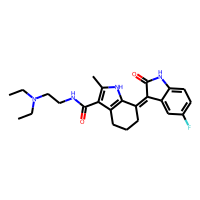
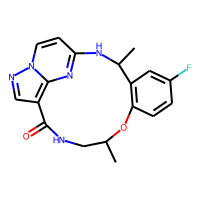

In [4]:
dataset = ligands.pkidb()
print(f"Number of ligands: {dataset.shape[0]}")
dataset.head()

## Kinase datasets

Get kinase details.

### KinMap

In [5]:
dataset = kinases.kinmap()
print(f"Number of kinases: {dataset.shape[0]}")
dataset.head()

Number of kinases: 536


,xName,Manning Name,HGNC Name,Kinase Name,Group,Family,SubFamily,UniprotID
0,ABL1,ABL,ABL1,Tyrosine-protein kinase ABL1,TK,Abl,NaN,P00519
1,ACK,ACK,TNK2,Activated CDC42 kinase 1,TK,Ack,NaN,Q07912
2,ACTR2,ACTR2,ACVR2A,Activin receptor type-2A,TKL,STKR,STKR2,P27037
3,ACTR2B,ACTR2B,ACVR2B,Activin receptor type-2B,TKL,STKR,STKR2,Q13705
4,ADCK4,ADCK4,ADCK4,Uncharacterized aarF domain-containing protein...,Atypical,ABC1,ABC1-A,Q96D53


### KLIFS

In [6]:
klifs_session = klifs.setup_remote()
dataset = klifs_session.kinases.all_kinases()
print(f"Number of kinases: {dataset.shape[0]}")
dataset.head()

Number of kinases: 1127


,kinase.klifs_id,kinase.klifs_name,kinase.full_name,kinase.gene_name,kinase.uniprot,species.klifs
0,529,A6,0,,0,Mouse
1,530,A6r,0,,0,Mouse
2,815,MarkmE3,RIKEN cDNA 4921509C19 gene,4921509C19Rik,Q8C0X8,Mouse
3,813,MarkmE1,RIKEN cDNA 4921509C19 gene,4921509C19Rik,Q8C0X8,Mouse
4,814,MarkmE2,RIKEN cDNA 4921509C19 gene,4921509C19Rik,Q8C0X8,Mouse


## Profiling datasets

Get kinase-ligand bioactivities.

### Karaman

Bioactivity measure: $K_D$ [nM]

Number of kinases: 268
Number of ligands: 30
Number of measurements: 1863


,Staurosporine,JNJ-7706621,MLN-8054,PKC-412,SU-14813,SB-202190,CP-724714,VX-680/MK-0457,Dasatinib,Roscovitine/CYC-202,SB-203580,Gefitinib,CP-690550,Imatinib,GW-2580,Lapatinib,GW-786034,Sorafenib,VX-745,SB-431542,ZD-6474,Sunitinib,Flavopiridol,Erlotinib,MLN-518,LY-333531,CI-1033,EKB-569,PI-103,PTK-787
AAK1,1.2,200.0,NaN,48.0,66.0,NaN,NaN,290.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2900.0,NaN,NaN,NaN,NaN,11.0,5300.0,1200.0,NaN,900.0,NaN,3500.0,NaN,NaN
ABL1,290.0,1200.0,820.0,NaN,1500.0,NaN,NaN,13.0,0.53,NaN,NaN,NaN,NaN,12.0,NaN,NaN,1700.0,680.0,730.0,NaN,270.0,830.0,NaN,310.0,NaN,NaN,1400.0,560.0,NaN,NaN
ABL2,110.0,NaN,3300.0,NaN,NaN,NaN,NaN,4.0,0.17,NaN,NaN,NaN,NaN,10.0,NaN,NaN,3000.0,2900.0,1900.0,NaN,69.0,1000.0,NaN,200.0,NaN,NaN,870.0,370.0,NaN,NaN
ALK2,470.0,5900.0,NaN,NaN,NaN,NaN,NaN,1900.0,620.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150.0,NaN,1900.0,NaN,2500.0,NaN,1700.0,NaN,NaN,NaN
ALK4,680.0,NaN,NaN,NaN,NaN,950.0,NaN,NaN,330.00,NaN,3000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,190.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


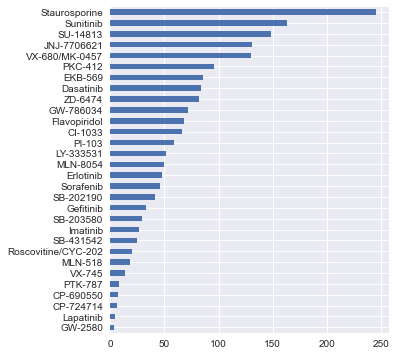

In [7]:
dataset = profiling.karaman()
print(f"Number of kinases: {dataset.shape[0]}")
print(f"Number of ligands: {dataset.shape[1]}")
print(f"Number of measurements: {dataset.unstack().dropna().shape[0]}")
display(HTML(dataset.head().to_html()))
dataset.count().sort_values().plot(kind="barh", figsize=(5, 6));

In [8]:
ligand = "Erlotinib"
n_measurements = dataset[ligand].dropna().shape[0]
print(f"Number of measurements for {ligand}: {n_measurements}")

Number of measurements for Erlotinib: 48


### Davis

Bioactivity measure: $K_D$ [nM]

Number of kinases: 350
Number of ligands: 72
Number of measurements: 7099


,TG-101348,SB-203580,Nilotinib,CHIR-265/RAF-265,AZD-1152HQPA,MLN-8054,AG-013736,CHIR-258/TKI-258,PKC-412,SU-14813,JNJ-28312141,PP-242,AC220,ABT-869,HKI-272,SGX-523,EXEL-2880/GSK-1363089,AB-1010,BMS-540215,PTK-787,Crizotinib,A-674563,Gefitinib,VX-680/MK-0457,CP-690550,PHA-665752,AMG-706,CI-1040,MLN-120B,Staurosporine,BMS-387032/SNS-032,BIRB-796,GSK-1838705A,BI-2536,GW-2580,R547,GSK-690693,GDC-0879,Lapatinib,PLX-4720,Dasatinib,R406,INCB18424,LY-317615,KW-2449,AT-7519,BIBF-1120 (derivative),VX-745,Ki-20227,BMS-345541,Vandetanib,Sorafenib,CEP-701,GSK-461364A,PD-173955,Pazopanib,AST-487,GDC-0941,TG-100-115,MLN-518,Sunitinib,Flavopiridol,Erlotinib,TAE-684,Imatinib,SKI-606,BIBW-2992,LY-333531,CI-1033,AZD-6244/ARRY-886,PI-103,AZD-2171
AAK1,35.0,NaN,NaN,NaN,3000.0,NaN,1200.0,170.0,48.0,66.0,520.0,1600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2300.0,43.0,NaN,290.0,NaN,320.0,NaN,NaN,NaN,1.2,NaN,NaN,NaN,2800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,410.0,120.0,2700.0,48.0,NaN,63.0,NaN,NaN,NaN,NaN,NaN,3.1,NaN,NaN,2900.0,NaN,9100.0,870.0,NaN,11.0,5300.0,1200.0,470.0,NaN,2300.000,NaN,900.0,NaN,NaN,NaN,NaN
ABL1,44.0,NaN,13.0,3600.0,5500.0,890.0,36.0,54.0,NaN,620.0,390.0,69.0,NaN,NaN,NaN,NaN,56.0,55.0,640.0,NaN,110.0,NaN,480.0,7.5,NaN,8200.0,6700.0,NaN,NaN,22.0,NaN,NaN,NaN,3500.0,NaN,NaN,NaN,NaN,NaN,2300.0,0.046,340.0,NaN,NaN,75.0,NaN,64.0,NaN,320.0,NaN,16.0,1400.0,1000.0,NaN,0.58,650.0,13.0,NaN,NaN,NaN,150.0,1500.0,76.0,170.0,21.0,0.057,570.0,NaN,30.0,NaN,NaN,78.0
ABL2,570.0,NaN,26.0,1900.0,NaN,3300.0,70.0,NaN,NaN,NaN,5300.0,1200.0,NaN,NaN,NaN,NaN,27.0,110.0,1800.0,NaN,460.0,NaN,1600.0,4.0,NaN,6900.0,4500.0,NaN,NaN,110.0,NaN,1300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2700.0,0.170,720.0,NaN,NaN,250.0,NaN,2000.0,1900.0,950.0,NaN,69.0,2900.0,6500.0,NaN,0.69,3000.0,3.4,NaN,NaN,NaN,1000.0,NaN,200.0,380.0,10.0,1.500,NaN,NaN,870.0,NaN,NaN,730.0
ALK2,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,390.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,440.0,NaN,NaN,1900.0,NaN,NaN,NaN,NaN,NaN,470.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,620.000,4800.0,NaN,NaN,140.0,NaN,600.0,NaN,NaN,NaN,150.0,NaN,75.0,NaN,160.00,NaN,NaN,NaN,NaN,2500.0,NaN,1900.0,NaN,29.0,NaN,NaN,NaN,NaN,1700.0,NaN,NaN,3400.0
ALK4,6700.0,3000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,860.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,680.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2400.0,NaN,NaN,330.000,1100.0,NaN,NaN,NaN,NaN,4900.0,NaN,NaN,NaN,NaN,NaN,86.0,NaN,96.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1500.0


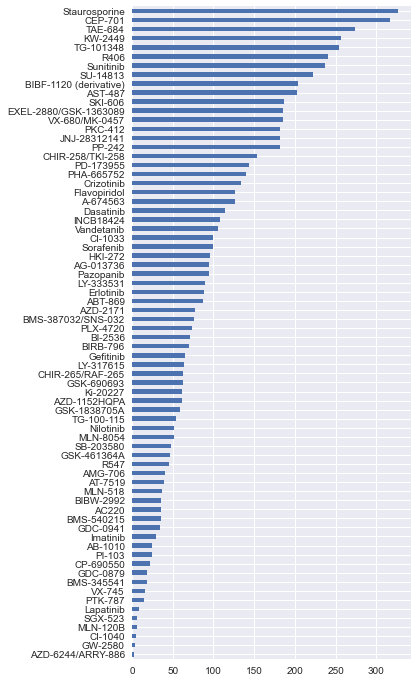

In [9]:
dataset = profiling.davis()
print(f"Number of kinases: {dataset.shape[0]}")
print(f"Number of ligands: {dataset.shape[1]}")
print(f"Number of measurements: {dataset.unstack().dropna().shape[0]}")
display(HTML(dataset.head().to_html()))
dataset.count().sort_values().plot(kind="barh", figsize=(5, 12));

### Karaman-Davis

Number of kinases: 353
Number of ligands: 80
Number of measurements: 7619


,Staurosporine,JNJ-7706621,MLN-8054,PKC-412,SU-14813,SB-202190,CP-724714,VX-680/MK-0457,Dasatinib,Roscovitine/CYC-202,SB-203580,Gefitinib,CP-690550,Imatinib,GW-2580,Lapatinib,GW-786034,Sorafenib,VX-745,SB-431542,ZD-6474,Sunitinib,Flavopiridol,Erlotinib,MLN-518,LY-333531,CI-1033,EKB-569,PI-103,PTK-787,TG-101348,Nilotinib,CHIR-265/RAF-265,AZD-1152HQPA,AG-013736,CHIR-258/TKI-258,JNJ-28312141,PP-242,AC220,ABT-869,HKI-272,SGX-523,EXEL-2880/GSK-1363089,AB-1010,BMS-540215,Crizotinib,A-674563,PHA-665752,AMG-706,CI-1040,MLN-120B,BMS-387032/SNS-032,BIRB-796,GSK-1838705A,BI-2536,R547,GSK-690693,GDC-0879,PLX-4720,R406,INCB18424,LY-317615,KW-2449,AT-7519,BIBF-1120 (derivative),Ki-20227,BMS-345541,Vandetanib,CEP-701,GSK-461364A,PD-173955,Pazopanib,AST-487,GDC-0941,TG-100-115,TAE-684,SKI-606,BIBW-2992,AZD-6244/ARRY-886,AZD-2171
AAK1,1.2,200.0,NaN,48.0,66.0,NaN,NaN,290.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2900.0,NaN,NaN,NaN,NaN,11.0,5300.0,1200.0,NaN,900.0,NaN,3500.0,NaN,NaN,35.0,NaN,NaN,3000.0,1200.0,170.0,520.0,1600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2300.0,43.0,320.0,NaN,NaN,NaN,NaN,NaN,NaN,2800.0,NaN,NaN,NaN,NaN,410.0,120.0,2700.0,48.0,NaN,63.0,NaN,NaN,NaN,3.1,NaN,NaN,2900.0,NaN,9100.0,870.0,470.0,2300.000,NaN,NaN,NaN
ABL1,NaN,1200.0,820.0,NaN,620.0,NaN,NaN,7.5,0.046,NaN,NaN,480.0,NaN,12.0,NaN,NaN,1700.0,680.0,730.0,NaN,270.0,150.0,1500.0,NaN,NaN,NaN,NaN,560.0,NaN,NaN,44.0,13.0,3600.0,5500.0,36.0,54.0,390.0,69.0,NaN,NaN,NaN,NaN,56.0,55.0,640.0,110.0,NaN,8200.0,6700.0,NaN,NaN,NaN,NaN,NaN,3500.0,NaN,NaN,NaN,2300.0,340.0,NaN,NaN,75.0,NaN,64.0,320.0,NaN,16.0,1000.0,NaN,0.58,650.0,13.0,NaN,NaN,170.0,0.057,570.0,NaN,78.0
ABL2,110.0,NaN,3300.0,NaN,NaN,NaN,NaN,4.0,0.170,NaN,NaN,1600.0,NaN,10.0,NaN,NaN,3000.0,2900.0,1900.0,NaN,69.0,1000.0,NaN,200.0,NaN,NaN,870.0,370.0,NaN,NaN,570.0,26.0,1900.0,NaN,70.0,NaN,5300.0,1200.0,NaN,NaN,NaN,NaN,27.0,110.0,1800.0,460.0,NaN,6900.0,4500.0,NaN,NaN,NaN,1300.0,NaN,NaN,NaN,NaN,NaN,2700.0,720.0,NaN,NaN,250.0,NaN,2000.0,950.0,NaN,69.0,6500.0,NaN,0.69,3000.0,3.4,NaN,NaN,380.0,1.500,NaN,NaN,730.0
ACK,16.0,NaN,NaN,120.0,4900.0,NaN,NaN,4400.0,5.600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8900.0,NaN,NaN,NaN,NaN,NaN,5200.0,120.0,NaN,64.0,NaN,NaN,NaN,6000.0,NaN,870.0,9600.0,NaN,NaN,680.0,NaN,200.0,NaN,NaN,760.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1100.0,70.0,2600.0,NaN,1600.0,NaN,1600.0,250.0,NaN,NaN,6.6,NaN,27.00,NaN,NaN,NaN,NaN,2.0,29.000,NaN,NaN,NaN
ACTR2,8900.0,2900.0,NaN,NaN,NaN,NaN,NaN,NaN,210.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,320.0,NaN,NaN,NaN,NaN,NaN,2500.0,NaN,10.00,NaN,NaN,NaN,NaN,2200.0,NaN,NaN,NaN,NaN


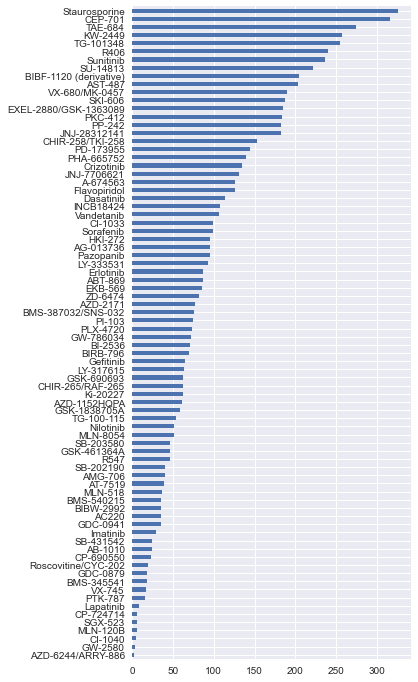

In [10]:
dataset = profiling.karaman_davis()
print(f"Number of kinases: {dataset.shape[0]}")
print(f"Number of ligands: {dataset.shape[1]}")
print(f"Number of measurements: {dataset.unstack().dropna().shape[0]}")
display(HTML(dataset.head().to_html()))
dataset.count().sort_values().plot(kind="barh", figsize=(5, 12));

### PKIS2

Bioactivity measure: 
> Percentage of the kinase that remains bound to the immobilized inhibitor relative to a DMSO control (% control). We then converted these numbers into percent inhibition (%Inh)
>
> $\%Inh = 100 - \%control$

https://doi.org/10.1371/journal.pone.0181585

We will call this measure here $\%displ$ (percent of kinase displaced)

In [11]:
dataset = profiling.pkis2(kinmap_kinases=True)
print(f"Number of kinases: {dataset.shape[0]}")
print(f"Number of ligands: {dataset.shape[1]}")
print(f"Number of measurements: {dataset.unstack().dropna().shape[0]}")
print(f"Minimum value: {dataset.min().min()}")
print(f"Maximum value: {dataset.max().max()}")
dataset.head()

/Users/dominique/mambaforge/envs/kissim-app-dev/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
Changed kinase names (unknown names may be discarded - see function docstring):
    kinase.input            kinase.kinmap
3          ACVR1                     ALK2
4         ACVR1B                     ALK4
5         ACVR2A                    ACTR2
6         ACVR2B                   ACTR2B
7         ACVRL1                     ALK1
..           ...                      ...
376         WNK1                     Wnk1
377         WNK2                     Wnk2
378         WNK3                     Wnk3
379         WNK4                     Wnk4
385         YSK4  unknown (not in KinMap)

[162 rows x 2 columns]


Number of kinases: 341
Number of ligands: 645
Number of measurements: 219945
Minimum value: 0.0
Maximum value: 100.0


compound,UNC10225469A,UNC10225012A,UNC10225159A,UNC10225310A,UNC10225187A,UNC10225062A,UNC10225296A,UNC10225430A,UNC10225266A,UNC10225324A,...,UNC10225504A,UNC10243858A,UNC10243859A,UNC10243860A,UNC10243861A,UNC10243862A,UNC10243863A,UNC10243880A,UNC10243881A,UNC10244034A
AAK1,14.0,0.0,0.0,0.0,26.0,0.0,10.0,0.0,0.0,0.0,...,6.0,30.0,18.0,0.0,16.0,0.0,0.0,61.0,25.0,0.0
ABL1,28.0,99.7,8.0,28.0,49.0,33.0,100.0,21.0,19.0,0.0,...,0.0,38.0,0.0,0.0,0.0,34.0,7.0,13.0,0.0,0.0
ABL2,5.0,81.0,5.0,100.0,3.0,12.0,100.0,14.0,3.0,14.0,...,5.0,0.0,2.0,17.0,0.0,0.0,19.0,47.0,17.0,0.0
ALK2,0.0,7.0,18.0,17.0,10.0,7.0,99.4,11.0,0.0,51.0,...,0.0,1.0,0.0,0.0,3.0,0.0,37.0,0.0,14.0,0.0
ALK4,0.0,9.0,0.0,15.0,85.0,0.0,79.0,0.0,100.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,8.0,0.0,0.0


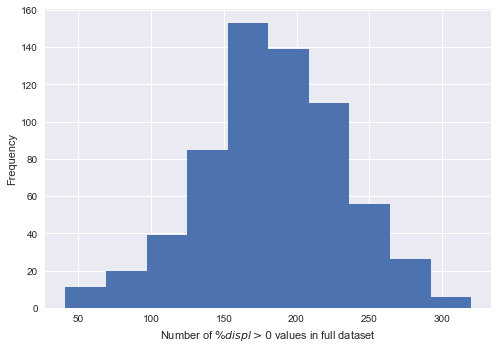

In [12]:
ax = (dataset > 0).sum().plot(kind="hist")
ax.set_xlabel(r"Number of $\%displ > 0$ values in full dataset");

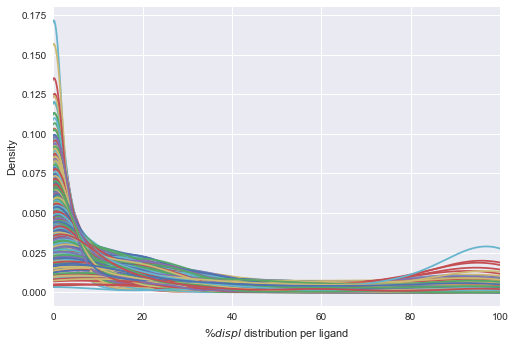

In [13]:
ax = dataset.plot(kind="kde", legend=None, xlim=(0, 100))
ax.set_xlabel(r"$\%displ$ distribution per ligand");

### Moret

Number of kinases: 365
Number of ligands: 138
Number of measurements: 1533


name,(-)-JQ1,"3,3',4',5-TETRACHLOROSALICYLANILIDE",A 1070722,A-674563,ABEMACICLIB,ACALABRUTINIB,ACETIC ACID,ADENOSINE PHOSPHATE,AFATINIB,ALECTINIB,ALPELISIB,ALVOCIDIB,ASCIMINIB,AST-487,AXITINIB,BARICITINIB,BELINOSTAT,BINIMETINIB,BITHIONOL,BIX 02565,BMS-345541,BMS-387032,BOSUTINIB,BRIGATINIB,CABOZANTINIB,CAPMATINIB,CC-671,CCT251545,CEDIRANIB,CEFSULODIN,CELECOXIB,CERITINIB,CF53,CHEMBL504950,COBIMETINIB,COPANLISIB,CP-724714,CRIZOTINIB,CYCLOBENZAPRINE,DABRAFENIB,DACOMITINIB,DANUSERTIB,DASATINIB,DIHYDROXYMETHYLZEARALENONE,DORAMAPIMOD,DOVITINIB,DUVELISIB,ELLAGIC ACID,ENCORAFENIB,ENTRECTINIB,ERDAFITINIB,ERLOTINIB,ETORICOXIB,EVEROLIMUS,FASUDIL,FEDRATINIB,FM381,FORETINIB,FOSTAMATINIB,GEFITINIB,GILTERITINIB,GSK-319347A,GSK1324726A,GSK481,GW843682X,H-89,HARMINE,HEXACHLOROPHENE,IBRUTINIB,IDELALISIB,IMATINIB,INGENOL,INGENOL MEBUTATE,KW-2449,LAPATINIB,LAROTRECTINIB,LENVATINIB,LESTAURTINIB,LINIFANIB,LINSITINIB,LORLATINIB,MASOPROCOL,MIDOSTAURIN,MITOXANTRONE,MK-2 Inhibitor III,MK-5108,MONTELUKAST,NEFLAMAPIMOD,NERATINIB,NILOTINIB,NINTEDANIB,NVP-TAE226,OSIMERTINIB,PALBOCICLIB,PANOBINOSTAT,PAZOPANIB,PD-407824,PELITINIB,PEXIDARTINIB,PF-03814735,PFI-1,PHA-767491,PONATINIB,Pyridone 6,R-406,RAF-265,REGORAFENIB,RIBOCICLIB,ROMIDEPSIN,RUCAPARIB,RUXOLITINIB,SB-203580,SB-7720770B,SCH772984,SELUMETINIB,SORAFENIB,STAUROSPORINE,SU-014813,SUNITINIB,TACROLIMUS,TAE-684,TANNIC ACID,TIVOZANIB,TOFACITINIB,TOZASERTIB,TRABECTEDIN,TRAMETINIB,TRETINOIN,TRIBROMSALAN,TROVAFLOXACIN,UCN-01,VANDETANIB,VEMURAFENIB,VISTUSERTIB,Y-27632,ZAFIRLUKAST,ZANUBRUTINIB,rac-CCT 250863
symbol,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AAK1,NaN,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116.0,NaN,NaN,NaN,NaN,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,428.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ABL1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0,NaN,NaN,NaN,0.5,NaN,3.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,658.0,NaN,150.0,NaN,NaN,NaN,53.0,NaN,NaN,NaN,631.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.1,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.5,48.0,NaN,NaN,NaN,NaN,605.0,NaN,NaN,NaN,NaN,NaN,NaN,0.82,NaN,NaN,NaN,753.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,215.0,NaN,NaN,202.0,NaN,NaN,NaN,195.0,NaN,NaN,NaN,NaN,NaN,NaN,631.0,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN
ABL2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,312.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,918.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,435.0,NaN,305.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,919.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,302.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.0,NaN,NaN,NaN,NaN,NaN,NaN
ACVR1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,370.0,NaN,NaN,NaN,NaN,485.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,440.0,NaN,NaN,NaN,NaN,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,804.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150.0,NaN,NaN,NaN,NaN,NaN,NaN
ACVR1B

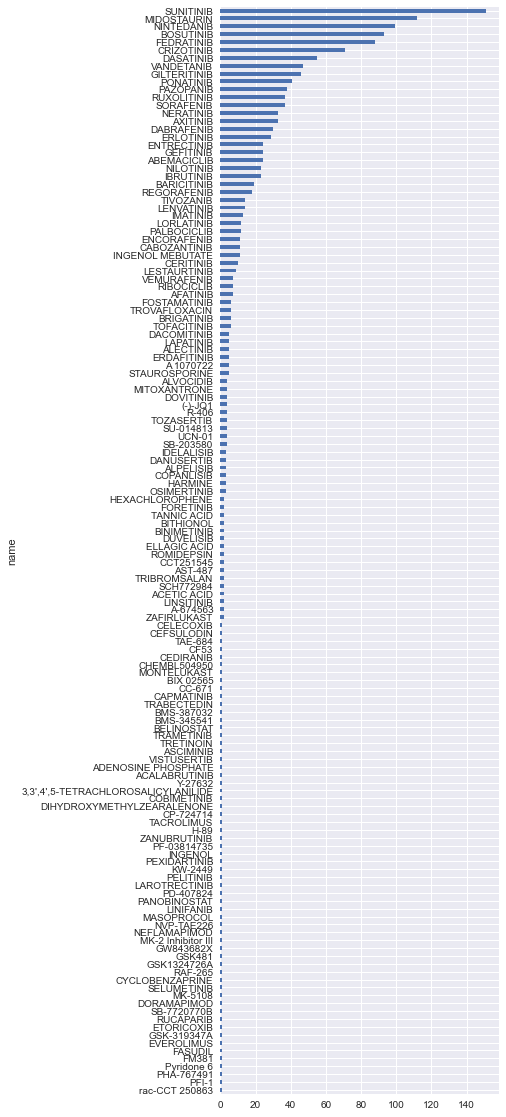

In [14]:
dataset = profiling.moret()
print(f"Number of kinases: {dataset.shape[0]}")
print(f"Number of ligands: {dataset.shape[1]}")
print(f"Number of measurements: {dataset.unstack().dropna().shape[0]}")
display(HTML(dataset.head().to_html()))
dataset.count().sort_values().plot(kind="barh", figsize=(5, 20));

## Kinase-kinase distances datasets

Get kinase-kinase distances.

### KiSSim

In [15]:
dataset = distances.kissim()
print(f"Kinase distance matrix dimensions: {dataset.shape}")
dataset.iloc[:5, :5]

Kinase distance matrix dimensions: (257, 257)


,AAK1,ABL1,ABL2,ACK,ACTR2
AAK1,0.000000,0.107122,0.111726,0.108950,0.110255
ABL1,0.107122,0.000000,0.011441,0.066001,0.115258
ABL2,0.111726,0.011441,0.000000,0.066760,0.121243
ACK,0.108950,0.066001,0.066760,0.000000,0.121621
ACTR2,0.110255,0.115258,0.121243,0.121621,0.000000


## Target datasets

Get targets for input ligands.

### PKIDB

In [16]:
ligand_names = ["Erlotinib", "Lapatinib", "Imatinib"]
targets.pkidb(ligand_names)

Changed kinase names (unknown names may be discarded - see function docstring):
   kinase.input            kinase.kinmap
1         NR1I2  unknown (not in KinMap)
3         ERBB2                    ErbB2
6         NTRK1                     TRKA
7         CSF1R                      FMS
8        PDGFRA                   PDGFRa
11       PDGFRB                   PDGFRb


,ligand.input,targets.pkidb,targets.kinmap
0,Erlotinib,[EGFR],[EGFR]
1,Lapatinib,"[EGFR, ERBB2]","[EGFR, ErbB2]"
2,Imatinib,"[KIT, RET, NTRK1, CSF1R, PDGFRA, DDR1, ABL1, P...","[KIT, RET, TRKA, FMS, PDGFRa, DDR1, ABL1, PDGFRb]"
